In [1]:

#first unzip the data ;
import zipfile
import os
#reaching the data
zip_file_path = '/content/waveform+database+generator+version+1.zip'

#unzipping

with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
     extract_path = 'content/database'
     zip_ref.extractall(extract_path)

#list the content
extracted_files = os.listdir(extract_path)
print(extracted_files)


['waveform-+noise.data.Z', 'waveform-+noise.c', 'waveform-+noise.names', 'Index', 'waveform.c', 'waveform.data.Z', 'waveform.names']


In [2]:
#loading and the discover it :
import subprocess

#definidingthe path:
data_files = ['waveform.data.Z','waveform-+noise.data.Z']
data_file_paths = [os.path.join(extract_path, file) for file in data_files]

#uncompress
uncompressed_data = []
for file_path in data_file_paths:
  uncompress_command = ['uncompress', '-c', file_path]

  results= subprocess.run(uncompress_command, capture_output=True,  text=True)

  if results.returncode ==0:
    uncompressed_data.append(results.stdout)
  else:
      uncompressed_data.append(f"Error{file_path}: {results.stderr}")
uncompressed_data[0][:500]


'-1.23,-1.56,-1.75,-0.28,0.60,2.22,0.85,0.21,-0.20,0.89,1.08,4.20,2.89,7.75,4.59,3.15,5.12,3.32,1.20,0.24,-0.56,2\n-0.69,2.43,0.61,2.08,2.30,3.25,5.52,4.55,2.97,2.22,2.81,1.61,1.24,1.89,1.88,-1.34,0.83,1.41,1.78,0.60,2.42,1\n-0.12,-0.94,1.29,2.59,2.42,3.55,4.94,3.25,1.90,2.07,0.51,1.45,2.50,0.12,1.41,2.78,0.64,0.62,-0.01,-0.79,-0.12,0\n0.86,0.29,2.19,-0.02,1.13,2.51,2.37,5.45,5.45,4.84,4.65,4.05,2.58,1.40,1.24,1.41,1.07,-1.43,2.84,-1.18,1.12,1\n1.16,0.37,0.40,-0.59,2.66,1.00,2.69,4.06,5.34,3.53,4.82,'

In [3]:
#preprocessing it :
import pandas as pd
import io
data_io= io.StringIO(uncompressed_data[0])
df_waveform= pd.read_csv(data_io, header=None)
df_waveform.head()


,0,1,2,3,4,5,6,7,8,9,...,12,13,14,15,16,17,18,19,20,21
0,-1.23,-1.56,-1.75,-0.28,0.60,2.22,0.85,0.21,-0.20,0.89,...,2.89,7.75,4.59,3.15,5.12,3.32,1.20,0.24,-0.56,2
1,-0.69,2.43,0.61,2.08,2.30,3.25,5.52,4.55,2.97,2.22,...,1.24,1.89,1.88,-1.34,0.83,1.41,1.78,0.60,2.42,1
2,-0.12,-0.94,1.29,2.59,2.42,3.55,4.94,3.25,1.90,2.07,...,2.50,0.12,1.41,2.78,0.64,0.62,-0.01,-0.79,-0.12,0
3,0.86,0.29,2.19,-0.02,1.13,2.51,2.37,5.45,5.45,4.84,...,2.58,1.40,1.24,1.41,1.07,-1.43,2.84,-1.18,1.12,1
4,1.16,0.37,0.40,-0.59,2.66,1.00,2.69,4.06,5.34,3.53,...,4.30,1.84,1.73,0.21,-0.18,0.13,-0.21,-0.80,-0.68,1


In [4]:
#checking the data classes if it's balanced
class_label =df_waveform.columns[-1]
value_counts = df_waveform[class_label].value_counts()
print(value_counts)

2    1696
0    1657
1    1647
Name: 21, dtype: int64


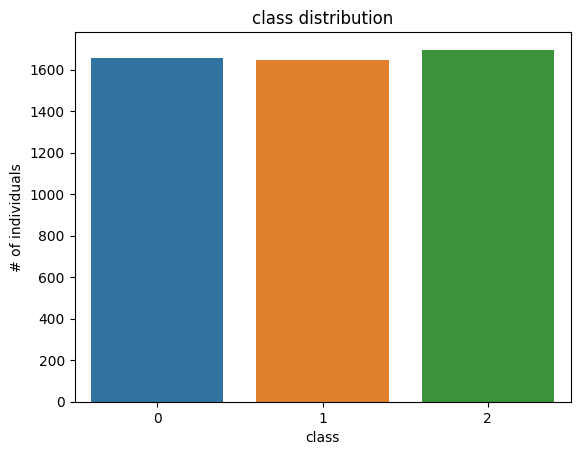

In [5]:
#plotting the classes distribution(it's good to see the diffrence between classes to understand the data)

import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

class_distribution = df_waveform[21].value_counts()
sns.barplot(x=class_distribution.index, y=class_distribution.values)
plt.title('class distribution')
plt.ylabel('# of individuals')
plt.xlabel('class')
plt.show()

In [6]:
#logistic regression:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from sklearn.linear_model import  LogisticRegression
from sklearn.ensemble import RandomForestClassifier

#spliting the data into features and labels
x =df_waveform.iloc[:, :-1]
y =df_waveform.iloc[:, -1]

#spliting into training and testing
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size= 0.20, random_state=42)

#using it to scaled it with zero meand and 1 standard divation
scaler= StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

#training the logsitic on the scaled training data

logistic_regression_model = LogisticRegression(max_iter = 1000)

logistic_regression_model.fit(x_train_scaled, y_train)

logistic_regression_pred = logistic_regression_model.predict(x_test_scaled)

logsitic_regression_report = classification_report(y_test, logistic_regression_pred)

print(logsitic_regression_report)



              precision    recall  f1-score   support

           0       0.89      0.83      0.86       333
           1       0.86      0.88      0.87       354
           2       0.87      0.90      0.89       313

    accuracy                           0.87      1000
   macro avg       0.87      0.87      0.87      1000
weighted avg       0.87      0.87      0.87      1000



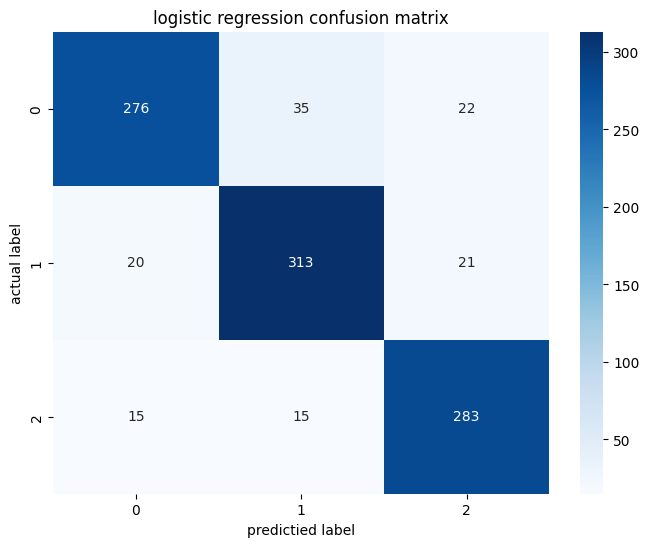

In [7]:
#logistics plot
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
cm_lr =confusion_matrix (y_test, logistic_regression_pred)
plt.figure(figsize=(8,6))
sns.heatmap(cm_lr, annot=True, fmt='d', cmap='Blues')
plt.title('logistic regression confusion matrix')
plt.ylabel('actual label')
plt.xlabel('predictied label')
plt.show()

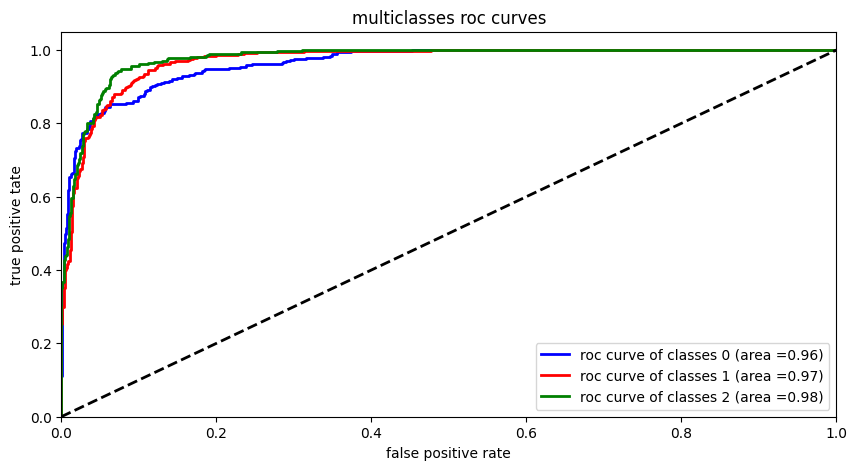

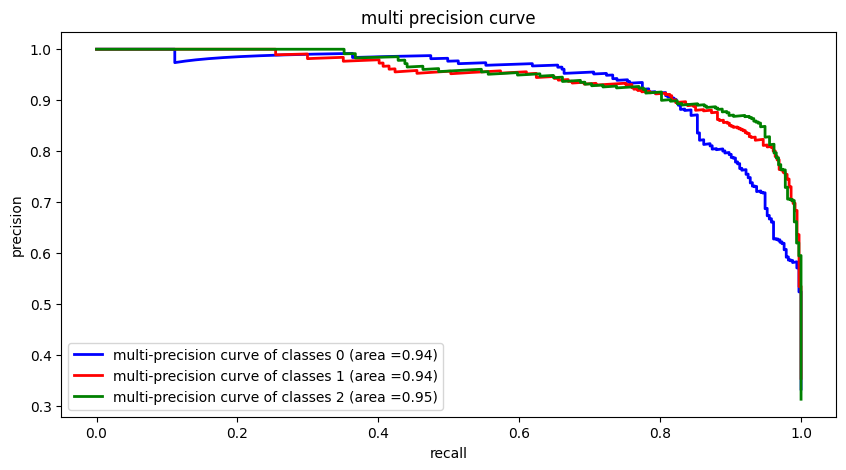

In [8]:
from sklearn.metrics import roc_curve,auc,precision_recall_curve
import numpy as np
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt

#convert the multy classes dat into binary class 1 vs all
y_test_bin = label_binarize(y_test, classes=np.unique(y_test))
#the number of unique classes(to detriminte ow many roc and precision to plot)
n_classes = y_test_bin.shape[1]
#computing the probability of how many outcomes for the samples
probabilities_lr =  logistic_regression_model.predict_proba(x_test_scaled)

fpr =dict()
tpr=dict()
roc_auc=dict()
precision =dict()
recall=dict()
pr_auc=dict()


probabilities_lr =  logistic_regression_model.predict_proba(x_test_scaled)

for i in range (n_classes):
  fpr[i], tpr[i],_ = roc_curve(y_test_bin[:,i],probabilities_lr[:,i])
  roc_auc[i] =auc(fpr[i],tpr[i])

  precision[i],recall[i],_ =precision_recall_curve(y_test_bin[:,i],probabilities_lr[:,i])
  pr_auc[i]=auc(recall[i],precision[i])




#roc
plt.figure(figsize=(10,5))
colors =iter(['blue', 'red', 'green', 'purple', 'orange'])
for i in range(n_classes):
  plt.plot(fpr[i],tpr[i],color=next(colors),lw=2, label='roc curve of classes {0} (area ={1:0.2f})'.format(i, roc_auc[i]))
plt.plot([0,1], [0,1], 'k--',lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0,1.05])
plt.xlabel('false positive rate')
plt.ylabel('true positive tate')
plt.title('multiclasses roc curves')
plt.legend(loc='lower right')
plt.show()

#precision
plt.figure(figsize=(10,5))
colors =iter(['blue', 'red', 'green', 'purple', 'orange'])
for i in range(n_classes):
  plt.plot(recall[i],precision[i],color=next(colors),lw=2, label='multi-precision curve of classes {0} (area ={1:0.2f})'.format(i, pr_auc[i]))
plt.xlabel('recall')
plt.ylabel('precision')
plt.title('multi precision curve')
plt.legend(loc='lower left')
plt.show()

In [9]:
#knn:
from sklearn.neighbors import KNeighborsClassifier

#creating the model with considering the knn5
knn_model = KNeighborsClassifier(n_neighbors =5)

#training the model on the sclaed data,target values
knn_model.fit(x_train_scaled, y_train)

y_pred = knn_model.predict(x_test_scaled)
#here to get the prediction report about the f1 and precision and recall
knn_report = classification_report(y_test, y_pred)
print(knn_report)

              precision    recall  f1-score   support

           0       0.84      0.74      0.79       333
           1       0.80      0.85      0.83       354
           2       0.80      0.85      0.83       313

    accuracy                           0.81      1000
   macro avg       0.82      0.81      0.81      1000
weighted avg       0.82      0.81      0.81      1000



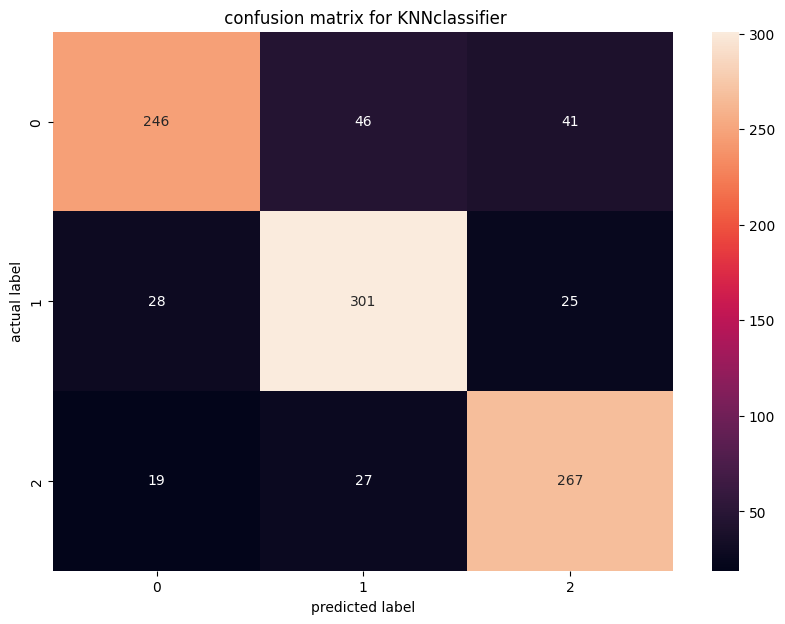

In [10]:
#confussin matrix of knn classifier
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
cm_lr =confusion_matrix (y_test, y_pred)
plt.figure(figsize=(10,7))
sns.heatmap(cm_lr, annot=True, fmt='d')
plt.title(' confusion matrix for KNNclassifier')
plt.ylabel('actual label')
plt.xlabel('predicted label')
plt.show()

In [11]:
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB

#initial the models

svm_model = SVC() # here set up support vector machine for the classfication
gbm_model = GradientBoostingClassifier() # here gradient boosting for rubst learning
naive_bayes_model = GaussianNB() #here naive bayes for the probabilities
# this is a dictionary to hold all the models
models = {'support vector machine': svm_model,
          'gradient boosting machine': gbm_model,
          'naive bayes': naive_bayes_model
          }
model_reports= {} # dic to store all the results
#loop for them to test and get the prediction and resutls
for model_name, model in models.items():
    model.fit(x_train_scaled, y_train)
    predictions =model.predict(x_test_scaled)
    report = classification_report(y_test, predictions)
    model_reports[model_name] = report
 # the results or the output

for model_name,report in model_reports.items():
    print(model_name)
    print(report)
    print('-' * 80) #separator for more clear to read

support vector machine
              precision    recall  f1-score   support

           0       0.90      0.83      0.86       333
           1       0.88      0.90      0.89       354
           2       0.86      0.91      0.89       313

    accuracy                           0.88      1000
   macro avg       0.88      0.88      0.88      1000
weighted avg       0.88      0.88      0.88      1000

--------------------------------------------------------------------------------
gradient boosting machine
              precision    recall  f1-score   support

           0       0.89      0.80      0.84       333
           1       0.86      0.90      0.88       354
           2       0.83      0.88      0.86       313

    accuracy                           0.86      1000
   macro avg       0.86      0.86      0.86      1000
weighted avg       0.86      0.86      0.86      1000

--------------------------------------------------------------------------------
naive bayes
              p

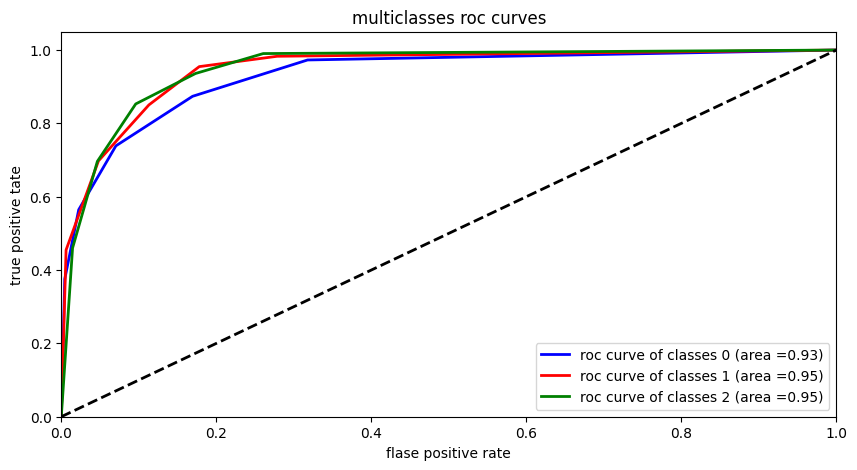

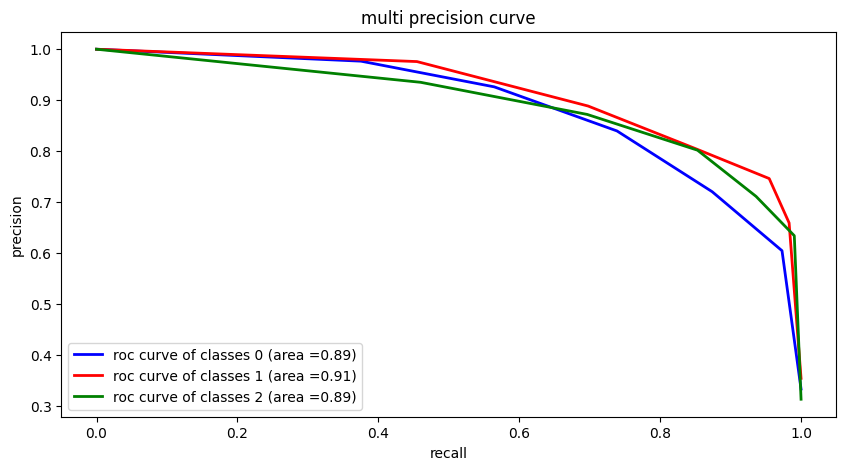

In [12]:
from sklearn.metrics import roc_curve,auc,precision_recall_curve
import numpy as np
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier

#trying knn with 5
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(x_train_scaled, y_train) #train the model
#convert the multiclasses to binary labels for roc and precison
y_test_bin = label_binarize(y_test, classes=np.unique(y_test))
n_classes = y_test_bin.shape[1] #determine the number of callses

probabilities_knn =  knn_model.predict_proba(x_test_scaled)
#dictionary to hold them
fpr =dict()
tpr=dict()
roc_auc=dict()
precision =dict()
recall=dict()
pr_auc=dict()


#lcompute the roc curve and roc area for every class
for i in range (n_classes):
  fpr[i], tpr[i],_ = roc_curve(y_test_bin[:,i],probabilities_knn[:,i])
  roc_auc[i] =auc(fpr[i],tpr[i])

  precision[i],recall[i],_ =precision_recall_curve(y_test_bin[:,i],probabilities_knn[:,i])
  pr_auc[i]=auc(recall[i],precision[i])




#roc plot
plt.figure(figsize=(10,5))
colors =iter(['blue', 'red', 'green', 'purple', 'orange'])
for i in range(n_classes):
  plt.plot(fpr[i],tpr[i],color=next(colors),lw=2, label='roc curve of classes {0} (area ={1:0.2f})'.format(i, roc_auc[i]))
plt.plot([0,1], [0,1], 'k--',lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0,1.05])
plt.xlabel('flase positive rate')
plt.ylabel('true positive tate')
plt.title('multiclasses roc curves')
plt.legend(loc='lower right')
plt.show()

#precsioion plot
plt.figure(figsize=(10,5))
colors =iter(['blue', 'red', 'green', 'purple', 'orange'])
for i in range(n_classes):
  plt.plot(recall[i],precision[i],color=next(colors),lw=2, label='roc curve of classes {0} (area ={1:0.2f})'.format(i, pr_auc[i]))
plt.xlabel('recall')
plt.ylabel('precision')
plt.title('multi precision curve')
plt.legend(loc='lower left')
plt.show()


29 0.8479999999999999


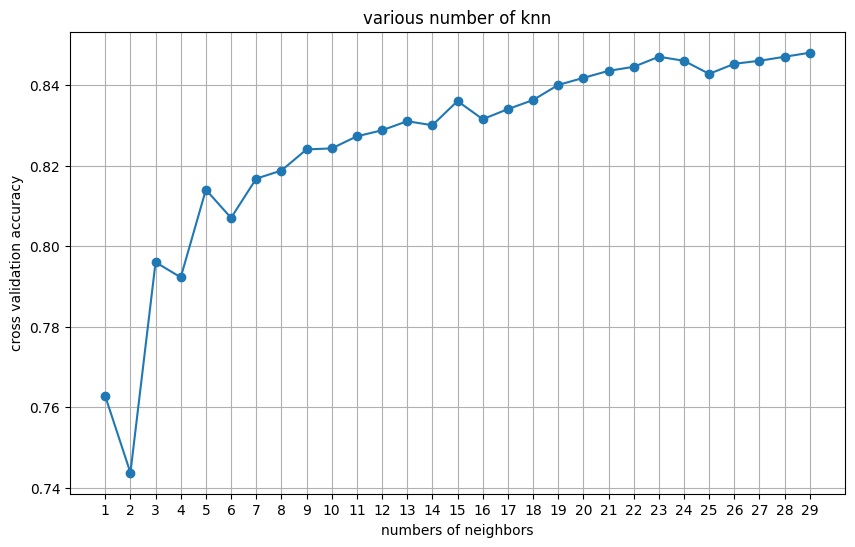

In [13]:
#find best k with orignal data
from sklearn.model_selection import GridSearchCV

#try to set k ranges from 1 to 29
k_range = list(range(1,30))

param_grid = dict(n_neighbors=k_range)
knn = KNeighborsClassifier()
grid = GridSearchCV(knn, param_grid, cv= 5, scoring = 'accuracy' )

grid.fit(x_train_scaled, y_train)

best_k = grid.best_params_['n_neighbors']
best_k_score =grid.best_score_
(best_k, best_k_score)
print(best_k, best_k_score)
mean_scores = grid.cv_results_['mean_test_score']
plt.figure(figsize=(10,6))
plt.plot(k_range, mean_scores, marker='o')
plt.title('various number of knn')
plt.xlabel('numbers of neighbors')
plt.ylabel('cross validation accuracy')
plt.xticks(k_range)
plt.grid(True)
plt.show()

In [14]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score

#pca reduction

pca= PCA(n_components= 0.95)
x_train_pca = pca.fit_transform(x_train_scaled)
x_test_pca= pca.transform(x_test_scaled)

knn_original = KNeighborsClassifier(n_neighbors=1)
knn_original.fit(x_train_scaled, y_train)
pred_original = knn_original.predict(x_test_scaled)
accuracy_original =accuracy_score(y_test, pred_original)

knn_reduced = KNeighborsClassifier(n_neighbors=1)

knn_reduced.fit(x_train_pca, y_train)
pred_reduced = knn_reduced.predict(x_test_pca)
accuracy_reduced = accuracy_score(y_test, pred_reduced)
print(f'accuracy with original data :{accuracy_original}')
print(f'accuracy with original data after pca : {accuracy_reduced}')
(accuracy_original, accuracy_reduced)

accuracy with original data :0.768
accuracy with original data after pca : 0.772


(0.768, 0.772)

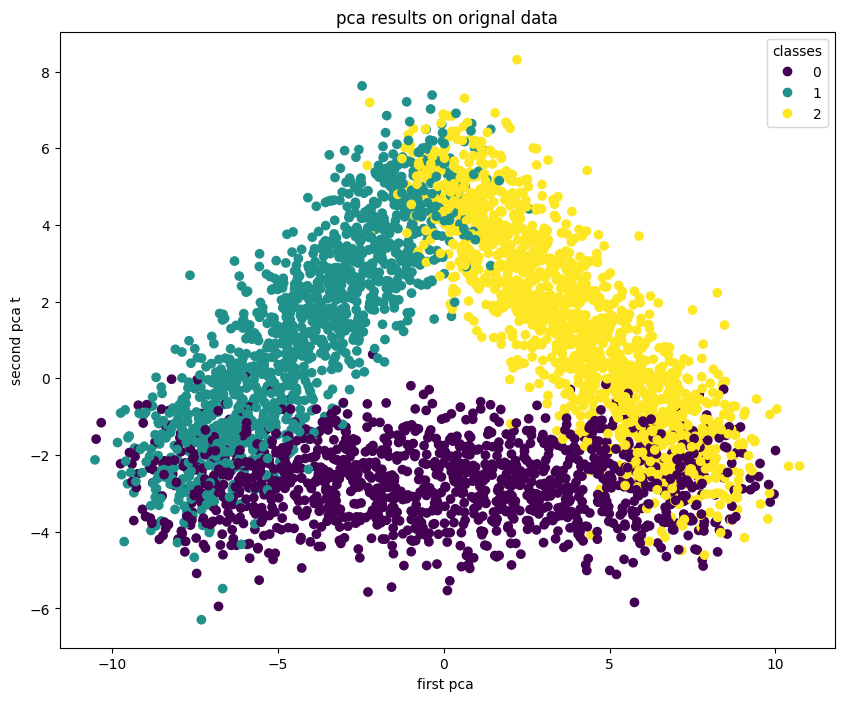

In [15]:
#pca plot on orignal data
pca= PCA(n_components= 2)
x_pca= pca.fit_transform(x_train)
plt.figure(figsize=(10,8))
scatter = plt.scatter(x_pca[:,0], x_pca[:,1], c=y_train, cmap='viridis')
plt.xlabel('first pca ')
plt.ylabel('second pca t')
plt.title('pca results on orignal data')
plt.legend(*scatter.legend_elements(), title='classes')
plt.show()

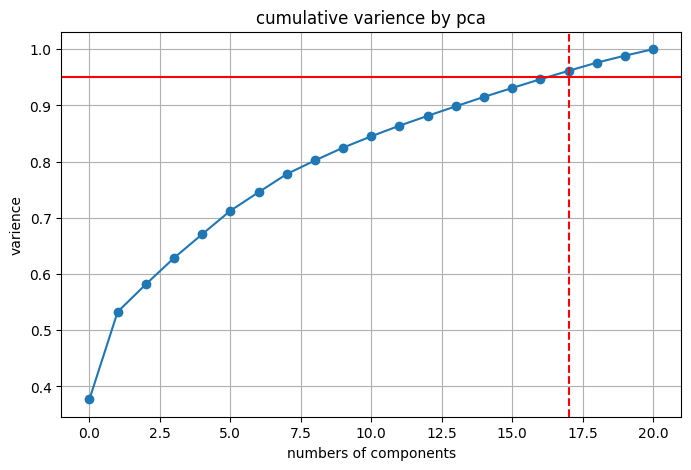

In [16]:
#plot the cumalative variance
from sklearn.decomposition import PCA
pca = PCA().fit(x_train_scaled)
cumulative_varience =np.cumsum(pca.explained_variance_ratio_)
plt.figure(figsize=(8,5))
plt.plot(cumulative_varience, marker='o')
plt.title('cumulative varience by pca')
plt.xlabel('numbers of components')
plt.ylabel('varience')
plt.grid(True)
plt.axhline(y=0.95, color='r', linestyle='-')
plt.axvline(x=np.argmax(cumulative_varience >=0.95), color='r', linestyle='--')
plt.show()

In [17]:

#speed the k by using different algorithms like brute force
import time
from sklearn.neighbors import  KNeighborsClassifier

knn_brute = KNeighborsClassifier(n_neighbors=1, algorithm='brute')
knn_brute.fit(x_train_scaled, y_train)

start_time = time.time()
knn_brute.predict(x_test_scaled)
brute_force_time = time.time() -start_time



print(brute_force_time, )


0.07999515533447266


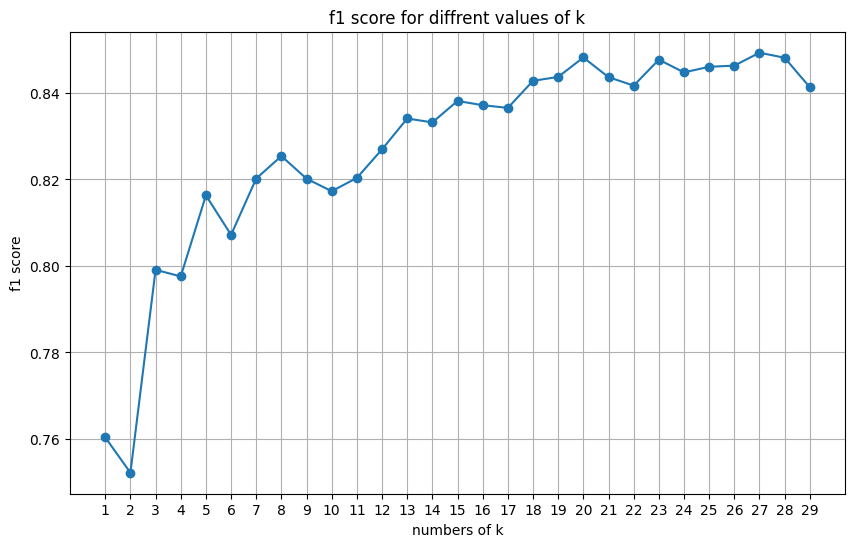

(27, 0.8493132644344895)

In [18]:
#data sergration and downsampling the classes of the data
from sklearn.utils import resample
from sklearn.metrics import f1_score
#segment the data into 3 classes based on column 21 values
class_0 =df_waveform[df_waveform[21] ==0]
class_1 =df_waveform[df_waveform[21] ==1]
class_2 =df_waveform[df_waveform[21] ==2]

#detrmine the smallest  class size to use ofr downsampling
min_class_size = min(len(class_0), len(class_1), len(class_2))
#downsampling class zero to fit the smallest class
class_0_downsampled =resample(class_0, replace=False, n_samples= min_class_size, random_state=123)

#combbine the donsampled classe with the others to form the new balanced datafram
df_downsampled = pd.concat([class_0_downsampled, class_1, class_2])
#spliting it to feature and target dataset
x_downsampled = df_downsampled.iloc[:,:-1]
y_downsampled =df_downsampled.iloc[:,-1]
#spliting to training and test
x_train_down, x_test_down, y_train_down, y_test_down = train_test_split(x_downsampled, y_downsampled, test_size= 0.25 , random_state = 42)

#scale the features to have zero mean and unit varience
scaler = StandardScaler()
x_train_down_scaled =scaler.fit_transform(x_train_down)
x_test_down_scaled = scaler.transform(x_test_down)

#creating list to keep track the diffrent values of f1  score for k values
f1_scores =[]

best_f1 = 0
best_k = 0
#loop to fidn the best k with f1 score after downsampling
for k in range(1,30) :
  knn = KNeighborsClassifier(n_neighbors=k)
  knn.fit(x_train_down_scaled, y_train_down)
  pred = knn.predict(x_test_down_scaled)
  f1 = f1_score(y_test_down, pred, average='macro')
  f1_scores.append(f1)
  if f1 > best_f1:
    best_f1 = f1
    best_k = k
(best_k, best_f1)
plt.figure(figsize=(10,6))
plt.plot(range(1,30), f1_scores, marker='o')
plt.title('f1 score for diffrent values of k')
plt.xlabel('numbers of k')
plt.ylabel('f1 score')
plt.xticks(range(1,30))
plt.grid(True)
plt.show()

(best_k, best_f1)

optimal number of features:19
f1 score:0.860144


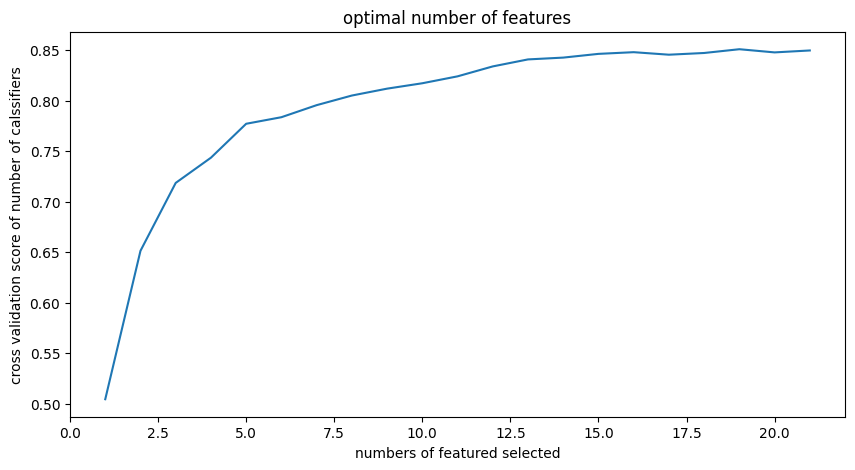

In [19]:
from sklearn.feature_selection import RFECV
from sklearn.model_selection import StratifiedKFold
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier

#recursever feature selection
estimator = RandomForestClassifier (n_estimators = 100, random_state= 42) #using random forest classifer as estimator
selector = RFECV(estimator, step = 1, cv=StratifiedKFold(5), scoring='f1_macro') #apply the recursive
selector = selector.fit(x_train_scaled, y_train)
print('optimal number of features:%d' % selector.n_features_)


x_train_selected = selector.transform(x_train_scaled) #transform the train and tested data to contain  only the selected features
x_test_selected =selector.transform(x_test_scaled)

smote = SMOTE(random_state=42) #inital smote to handle the imbalacing between the classes by oversampling minorty classes
x_train_smote, y_train_smote = smote.fit_resample(x_train_selected, y_train)

classifier = RandomForestClassifier(n_estimators=100, random_state = 42)
classifier.fit(x_train_smote, y_train_smote) #  training the classifier on the  somte resampled data
# with the classifer predict on the testes
y_pred= classifier.predict(x_test_selected)
f1 = f1_score(y_test, y_pred, average='macro') # to get the f# score as measure of the model performance
print('f1 score:{:3f}'.format(f1))
#RFECV plot
plt.figure(figsize=(10,5))
plt.title('optimal number of features')
plt.xlabel('numbers of featured selected')
plt.ylabel('cross validation score of number of calssifiers')
plt.plot(range(1,len(selector.cv_results_['mean_test_score']) +1), selector.cv_results_['mean_test_score'])
plt.show()

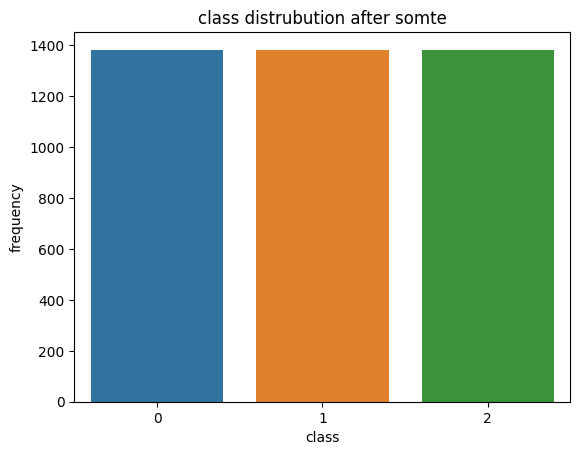

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

#visualize the classes distrubution after somte
sns.countplot(x=y_train_smote)
plt.title('class distrubution after somte')
plt.xlabel('class')
plt.ylabel('frequency')
plt.show()

#Trying to use the CNN to reduce the dimentions of the data

In [21]:

df_waveform.head()

,0,1,2,3,4,5,6,7,8,9,...,12,13,14,15,16,17,18,19,20,21
0,-1.23,-1.56,-1.75,-0.28,0.60,2.22,0.85,0.21,-0.20,0.89,...,2.89,7.75,4.59,3.15,5.12,3.32,1.20,0.24,-0.56,2
1,-0.69,2.43,0.61,2.08,2.30,3.25,5.52,4.55,2.97,2.22,...,1.24,1.89,1.88,-1.34,0.83,1.41,1.78,0.60,2.42,1
2,-0.12,-0.94,1.29,2.59,2.42,3.55,4.94,3.25,1.90,2.07,...,2.50,0.12,1.41,2.78,0.64,0.62,-0.01,-0.79,-0.12,0
3,0.86,0.29,2.19,-0.02,1.13,2.51,2.37,5.45,5.45,4.84,...,2.58,1.40,1.24,1.41,1.07,-1.43,2.84,-1.18,1.12,1
4,1.16,0.37,0.40,-0.59,2.66,1.00,2.69,4.06,5.34,3.53,...,4.30,1.84,1.73,0.21,-0.18,0.13,-0.21,-0.80,-0.68,1


In [30]:
#data reduction: trying the CNN ,Data reduction technique

def clean_data(S):
  x= S[ :,: -1]
  y= S[ :, -1]
  S1_x, S2_x,S1_y, S2_y = train_test_split(x,y,test_size=0.5)

  S1 =np.column_stack((S1_x, S1_y))
  S2 =np.column_stack((S2_x,S2_y))

  stabilized =False
  while not stabilized:

    knn= KNeighborsClassifier(n_neighbors=1)
    knn.fit(S2[:,: -1],S2[ :, -1])
    S1_predictions = knn.predict(S1[ :,: -1])

    misclassified = S1_predictions !=S1[:,-1]
    S1=S1[~misclassified]
    knn.fit(S1[:,: -1],S1[ :, -1])

    S2_predictions = knn.predict(S2[ :,: -1])
    misclassified = S2_predictions !=S2[:,-1]
    S2_cleaned =S2[~misclassified]

    if len(S2_cleaned) == len(S2):
      stabilized =True
    else :
      S2= S2_cleaned

  S_cleaned = np.vstack((S1,S2))
  return(S_cleaned)


def condensed_nearest_neighbour(S):
  x= S[ :,: -1]
  y= S[ :, -1]
  storage_x = x[:1,:]
  storage_y = y[:1]
  dustbin=[]

  stabilized =False
  while not stabilized:

    previous_storage_size =len(storage_x)
    for xi, target in zip(x,y):
      knn= KNeighborsClassifier(n_neighbors=1)
      knn.fit(storage_x, storage_y.reshape(-1))
      prediction = knn.predict(xi.reshape(1,-1))
      if prediction !=target:
        storage_x = np.vstack((storage_x, xi))
        storage_y = np.vstack((storage_y, target))
      else:
        dustbin.append(xi)

    if previous_storage_size ==len(storage_x):
      stabilized = True

  Storage = np.column_stack((storage_x,storage_y.flatten()))
  return Storage, np.array(dustbin)


waveform_array = df_waveform.to_numpy()
cleaned_waveform = clean_data(waveform_array)
final_waveform, _ = condensed_nearest_neighbour(cleaned_waveform)



print("cleaned data ", final_waveform)

cleaned data  [[ 2.1   0.03  0.85 ...  1.64 -0.28  1.  ]
 [-1.47  0.48  1.77 ... -0.67  0.27  0.  ]
 [-0.35 -0.4   0.17 ...  0.22 -0.62  2.  ]
 ...
 [-0.26 -1.05  0.75 ... -0.36  1.6   1.  ]
 [ 0.37 -0.72  2.98 ... -0.97 -0.07  1.  ]
 [ 0.88  0.51  1.11 ...  0.9   0.81  1.  ]]


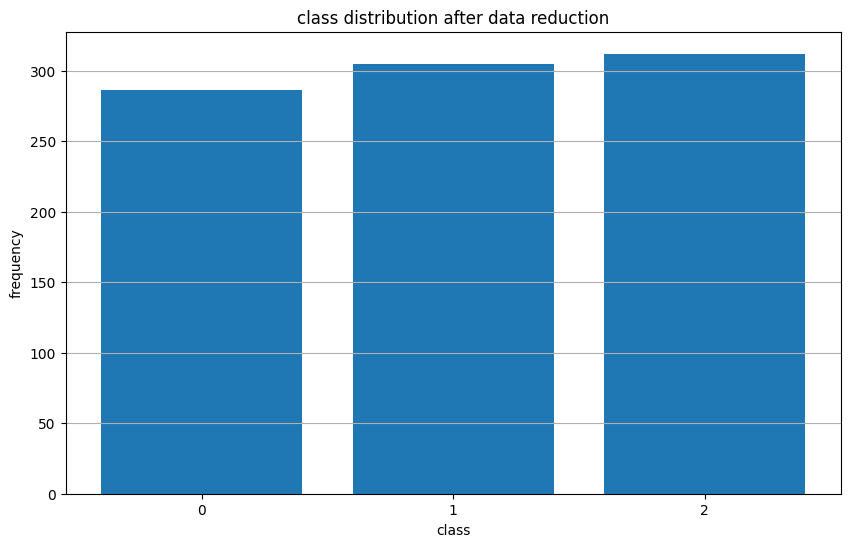

In [31]:
#the class distribution after data reduction
y_final= final_waveform[:,-1]
unique, counts = np.unique(y_final, return_counts=True)
class_counts= dict(zip(unique, counts))
plt.figure(figsize=(10,6))
plt.bar(class_counts.keys(), class_counts.values())
plt.title('class distribution after data reduction')
plt.ylabel('frequency')
plt.xlabel('class')
plt.xticks(list(class_counts.keys()))
plt.grid(axis='y')
plt.show()

In [32]:
#cleaned
#we are losing important information and accuracy, like nothing change more than having less time of computation !
from sklearn.metrics import classification_report
x_cleaned = final_waveform[:,:-1]
y_cleaned = final_waveform[:,-1].astype(int)
x_train_cleaned, x_test_cleaned, y_train_cleaned, y_test_cleaned = train_test_split(x_cleaned,y_cleaned,test_size= 0.20, random_state=42)

knn_cleaned = KNeighborsClassifier(n_neighbors =5)
knn_cleaned.fit(x_train_cleaned, y_train_cleaned)

y_pred_cleaned = knn_cleaned.predict(x_test_cleaned)
print(classification_report(y_test_cleaned,y_pred_cleaned))

              precision    recall  f1-score   support

           0       0.56      0.57      0.57        49
           1       0.76      0.71      0.73        66
           2       0.67      0.70      0.68        66

    accuracy                           0.67       181
   macro avg       0.66      0.66      0.66       181
weighted avg       0.67      0.67      0.67       181



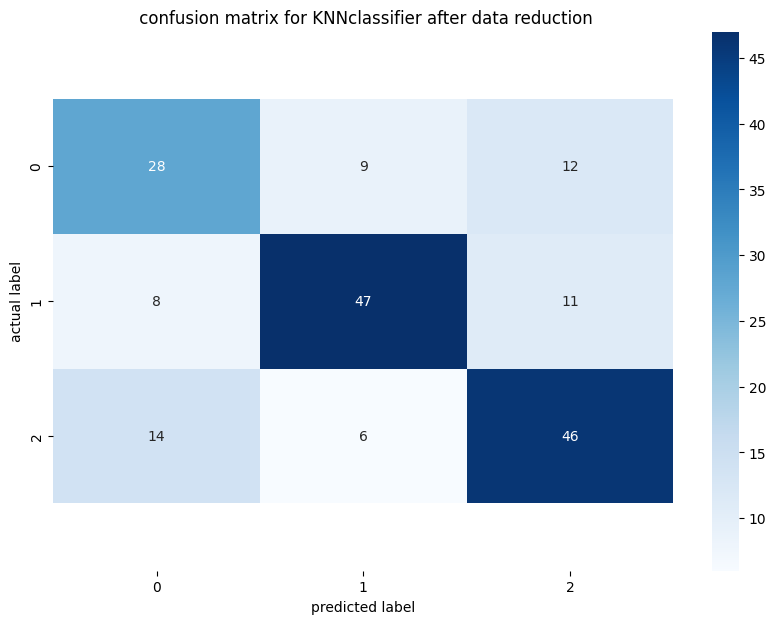

In [33]:
#confussin matrix of knn classifier after data reduction(cleaned)
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm_lr_reduced =confusion_matrix (y_test_cleaned, y_pred_cleaned)
plt.figure(figsize=(10,7))
sns.heatmap(cm_lr_reduced, annot=True, fmt='d', cmap='Blues')
plt.title(' confusion matrix for KNNclassifier after data reduction')
plt.ylabel('actual label')
plt.xlabel('predicted label')
bottom,top =plt.ylim()
bottom+=0.5
top -=0.5
plt.ylim(bottom,top)
plt.show()

best k after reduction: 24 0.793668582375479


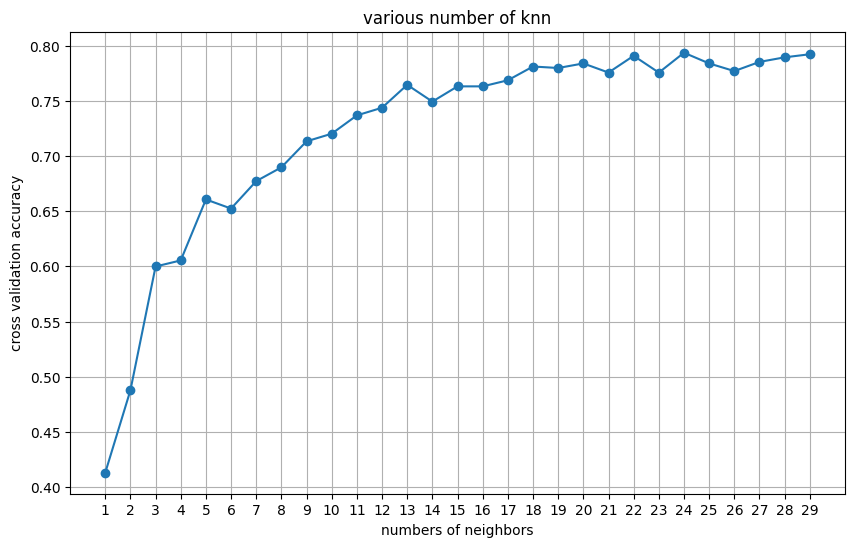

In [34]:
#find best k with cleaned data
from sklearn.model_selection import GridSearchCV

#try to set k ranges from 1 to 29
k_range = list(range(1,30))

param_grid = dict(n_neighbors=k_range)
knn = KNeighborsClassifier()
grid = GridSearchCV(knn, param_grid, cv= 5, scoring = 'accuracy' )

grid.fit(x_train_cleaned, y_train_cleaned)

best_k= grid.best_params_['n_neighbors']
best_k_score=grid.best_score_
print('best k after reduction:',best_k, best_k_score)

mean_scores = grid.cv_results_['mean_test_score']
plt.figure(figsize=(10,6))
plt.plot(k_range, mean_scores, marker='o')
plt.title('various number of knn')
plt.xlabel('numbers of neighbors')
plt.ylabel('cross validation accuracy')
plt.xticks(k_range)
plt.grid(True)
plt.show()

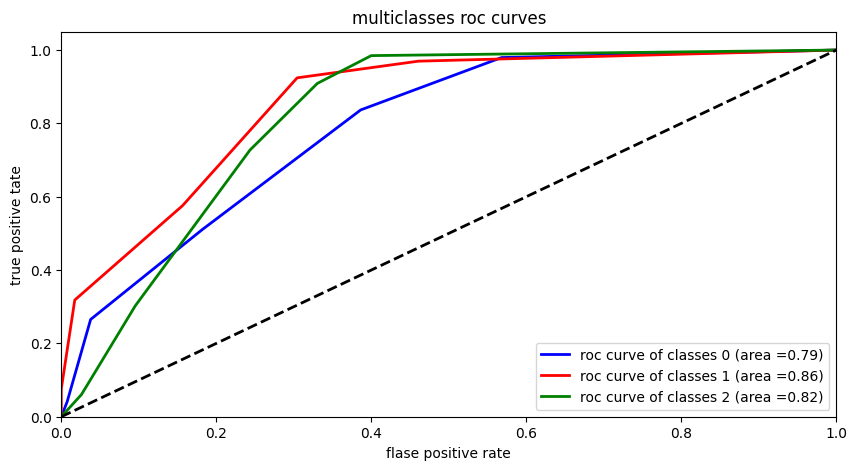

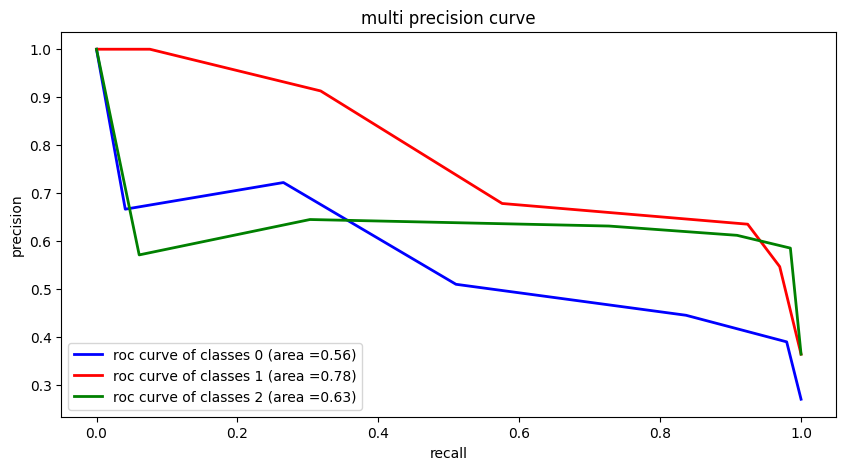

In [35]:
from sklearn.metrics import roc_curve,auc,precision_recall_curve
import numpy as np
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier

scalar=StandardScaler()
x_train_cleaned_scaled= scalar.fit_transform(x_train_cleaned)
x_test_cleaned_scaled= scalar.fit_transform(x_test_cleaned)
#trying knn with 5
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(x_train_cleaned_scaled, y_train_cleaned) #train the model
#convert the multiclasses to binary labels for roc and precison
y_test_bin = label_binarize(y_test_cleaned, classes=np.unique(y_test_cleaned))
n_classes = y_test_bin.shape[1] #determine the number of callses

probabilities_knn =  knn_model.predict_proba(x_test_cleaned_scaled)
#dictionary to hold them
fpr =dict()
tpr=dict()
roc_auc=dict()
precision =dict()
recall=dict()
pr_auc=dict()


#compute the roc curve and roc area for every class
for i in range (n_classes):
  fpr[i], tpr[i],_ = roc_curve(y_test_bin[:,i],probabilities_knn[:,i])
  roc_auc[i] =auc(fpr[i],tpr[i])

  precision[i],recall[i],_ =precision_recall_curve(y_test_bin[:,i],probabilities_knn[:,i])
  pr_auc[i]=auc(recall[i],precision[i])




#roc plot
plt.figure(figsize=(10,5))
colors =iter(['blue', 'red', 'green', 'purple', 'orange'])
for i in range(n_classes):
  plt.plot(fpr[i],tpr[i],color=next(colors),lw=2, label='roc curve of classes {0} (area ={1:0.2f})'.format(i, roc_auc[i]))
plt.plot([0,1], [0,1], 'k--',lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0,1.05])
plt.xlabel('flase positive rate')
plt.ylabel('true positive tate')
plt.title('multiclasses roc curves')
plt.legend(loc='lower right')
plt.show()

#precsioion plot
plt.figure(figsize=(10,5))
colors =iter(['blue', 'red', 'green', 'purple', 'orange'])
for i in range(n_classes):
  plt.plot(recall[i],precision[i],color=next(colors),lw=2, label='roc curve of classes {0} (area ={1:0.2f})'.format(i, pr_auc[i]))
plt.xlabel('recall')
plt.ylabel('precision')
plt.title('multi precision curve')
plt.legend(loc='lower left')
plt.show()

In [36]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score

#pca reduction(cleaned)

pca= PCA(n_components= 0.95)
x_train_pca = pca.fit_transform(x_train_cleaned_scaled)
x_test_pca= pca.transform(x_test_cleaned_scaled)

knn_original = KNeighborsClassifier(n_neighbors=1)
knn_original.fit(x_train_cleaned_scaled, y_train_cleaned)
pred_original = knn_original.predict(x_test_cleaned_scaled)
accuracy_original =accuracy_score(y_test_cleaned, pred_original)

knn_reduced = KNeighborsClassifier(n_neighbors=1)

knn_reduced.fit(x_train_pca, y_train_cleaned)
pred_reduced = knn_reduced.predict(x_test_pca)
accuracy_reduced = accuracy_score(y_test_cleaned, pred_reduced)
print(f'accuracy with cleaned data :{accuracy_original}')
print(f'accuracy with cleaned data after pca : {accuracy_reduced}')
(accuracy_original, accuracy_reduced)

accuracy with cleaned data :0.4419889502762431
accuracy with cleaned data after pca : 0.47513812154696133


(0.4419889502762431, 0.47513812154696133)

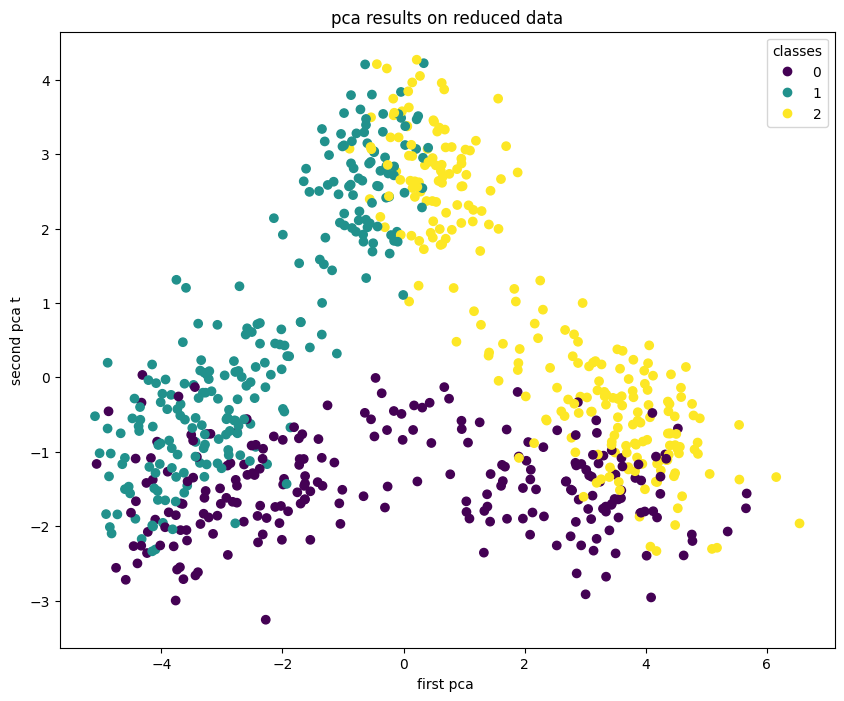

In [37]:
#pca plot on reduced data

pca_cleaned= PCA(n_components= 2)
x_pca_cleaned= pca_cleaned.fit_transform(x_train_cleaned_scaled)
plt.figure(figsize=(10,8))
scatter = plt.scatter(x_pca_cleaned[:,0], x_pca_cleaned[:,1], c=y_train_cleaned, cmap='viridis')
plt.xlabel('first pca ')
plt.ylabel('second pca t')
plt.title('pca results on reduced data')
plt.legend(*scatter.legend_elements(), title='classes')
plt.show()

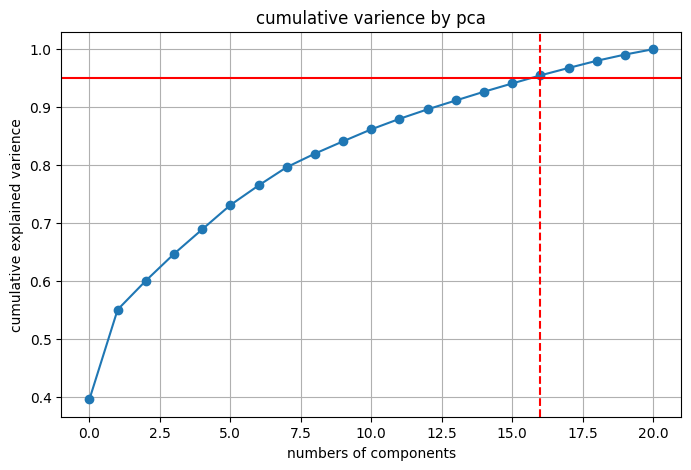

In [38]:
#plot the cumalative variance pf pca
from sklearn.decomposition import PCA
pca = PCA().fit(x_train_cleaned_scaled)
cumulative_varience =np.cumsum(pca.explained_variance_ratio_)
plt.figure(figsize=(8,5))
plt.plot(cumulative_varience, marker='o')
plt.title('cumulative varience by pca')
plt.xlabel('numbers of components')
plt.ylabel('cumulative explained varience')
plt.grid(True)
plt.axhline(y=0.95, color='r', linestyle='-')
plt.axvline(x=np.argmax(cumulative_varience >=0.95), color='r', linestyle='--')
plt.show()

In [39]:

#speed the k by using different algorithms like brute force
import time
from sklearn.neighbors import  KNeighborsClassifier

knn_brute = KNeighborsClassifier(n_neighbors=1, algorithm='brute')
knn_brute.fit(x_train_cleaned_scaled, y_train_cleaned)

start_time = time.time()
knn_brute.predict(x_test_cleaned_scaled)
brute_force_time_after_cleaning = time.time() -start_time




print(brute_force_time_after_cleaning )



0.06612443923950195


In [40]:
#data sergration and downsampling the classes of the data
from sklearn.utils import resample
from sklearn.metrics import f1_score

df_final= pd.DataFrame(final_waveform)

def classify_and_find_the_best_k(df_reduced):
  class_0 = df_reduced[df_reduced.iloc[:,-1] ==0]
  class_1 =df_reduced[df_reduced.iloc[:,-1] ==1]
  class_2 =df_reduced[df_reduced.iloc[:,-1] ==2]


#detrmine the smallest  class size to use ofr downsampling
  min_class_size = min(len(class_0), len(class_1), len(class_2))
#downsampling class zero to fit the smallest class
  class_0_downsampled =resample(class_0, replace=False, n_samples= min_class_size, random_state=123)

#combbine the donsampled classe with the others to form the new balanced datafram
  df_downsampled = pd.concat([class_0_downsampled, class_1, class_2])
#spliting it to feature and target dataset
  x_downsampled = df_downsampled.iloc[:,:-1]
  y_downsampled =df_downsampled.iloc[:,-1]
#spliting to training and test
  x_train_down, x_test_down, y_train_down, y_test_down = train_test_split(x_downsampled, y_downsampled, test_size= 0.25 , random_state = 42)

#scale the features to have zero mean and unit varience
  scaler = StandardScaler()
  x_train_down_scaled =scaler.fit_transform(x_train_down)
  x_test_down_scaled = scaler.transform(x_test_down)

#creating list to keep track the diffrent values of f1  score for k values
  f1_scores =[]

  best_f1 = 0
  best_k = 0
#loop to fidn the best k with f1 score
  for k in range(1,30) :
      knn = KNeighborsClassifier(n_neighbors=k)
      knn.fit(x_train_down_scaled, y_train_down)
      pred = knn.predict(x_test_down_scaled)
      f1 = f1_score(y_test_down, pred, average='macro')
      f1_scores.append(f1)
      if f1 > best_f1:
         best_f1 = f1
         best_k = k
  return best_k, best_f1, f1_scores

best_k_final, best_f1_final, f1_scores_final = classify_and_find_the_best_k(df_final)
print('cleaned data - best k:', best_k_final, "best f1 score:", best_f1_final)

cleaned data - best k: 25 best f1 score: 0.7839925576349729


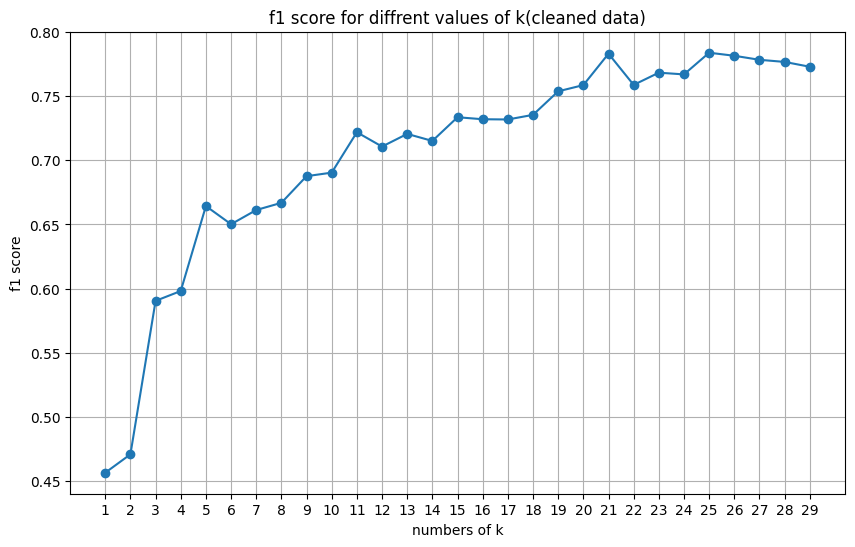

25 0.7839925576349729


In [43]:
plt.figure(figsize=(10,6))
plt.plot(range(1,30), f1_scores_final, marker='o')
plt.title('f1 score for diffrent values of k(cleaned data)')
plt.xlabel('numbers of k')
plt.ylabel('f1 score')
plt.xticks(range(1,30))
plt.grid(True)
plt.show()

print(best_k_final, best_f1_final)

optimal number of features:15
f1 score:0.747879


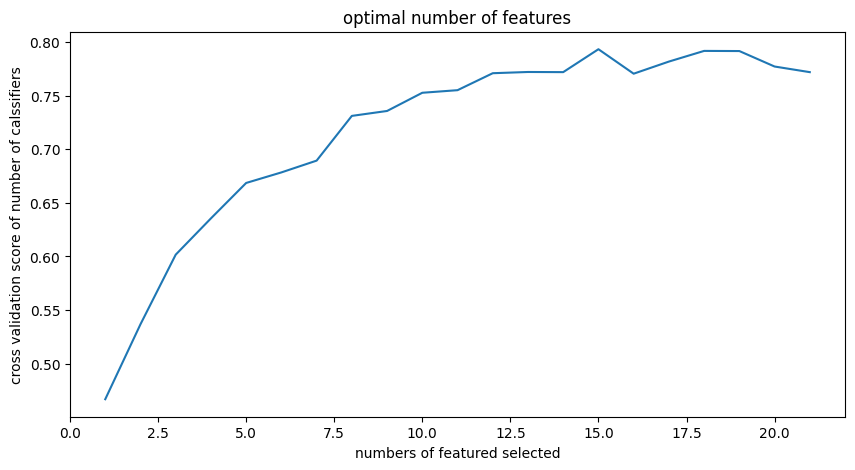

In [42]:
from sklearn.feature_selection import RFECV
from sklearn.model_selection import StratifiedKFold
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier

#recursever feature selection with reduced data
estimator = RandomForestClassifier (n_estimators = 100, random_state= 42) #using random forest classifer as estimator
selector_reduced = RFECV(estimator, step = 1, cv=StratifiedKFold(5), scoring='f1_macro') #apply the recursive
selector_reduced = selector_reduced.fit(x_train_cleaned_scaled, y_train_cleaned)
print('optimal number of features:%d' % selector_reduced.n_features_)


x_train_selected_reduced = selector_reduced.transform(x_train_cleaned_scaled) #transform the train and tested data to contain  only the selected features
x_test_selected_reduced =selector_reduced.transform(x_test_cleaned_scaled)

smote_cleaned = SMOTE(random_state=42) #inital smote to handle the imbalacing between the classes by oversampling minorty classes
x_train_smote_reduced, y_train_smote_reduced = smote_cleaned.fit_resample(x_train_selected_reduced, y_train_cleaned)

classifier_reduced = RandomForestClassifier(n_estimators=100, random_state = 42)
classifier_reduced.fit(x_train_smote_reduced, y_train_smote_reduced) #  training the classifier on the  somte resampled data
# with the classifer predict on the testes
y_pred_reduced= classifier_reduced.predict(x_test_selected_reduced)
f1 = f1_score(y_test_cleaned, y_pred_reduced, average='macro') # to get the f# score as measure of the model performance
print('f1 score:{:3f}'.format(f1))
#RFECV plot
plt.figure(figsize=(10,5))
plt.title('optimal number of features')
plt.xlabel('numbers of featured selected')
plt.ylabel('cross validation score of number of calssifiers')
plt.plot(range(1,len(selector_reduced.cv_results_['mean_test_score']) +1), selector_reduced.cv_results_['mean_test_score'])
plt.show()

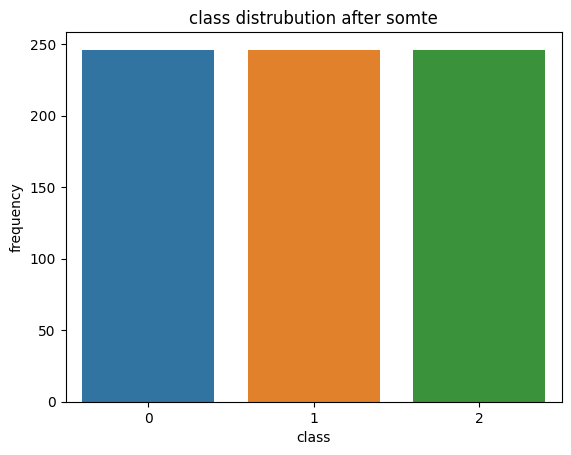

In [44]:
import seaborn as sns
import matplotlib.pyplot as plt

#visualize the classes distrubution after somte and reduction
sns.countplot(x=y_train_smote_reduced)
plt.title('class distrubution after somte')
plt.xlabel('class')
plt.ylabel('frequency')
plt.show()